In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import pickle
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.metrics import classification_report,confusion_matrix ,accuracy_score , plot_confusion_matrix ,plot_roc_curve

In [2]:
df=pd.read_csv('Star39552_balanced.csv')

In [3]:
df.shape

(39552, 7)

In [4]:
df.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,10.00,31.66,6.19,1.213,K7V,22.502556,1
1,8.26,3.21,1.00,1.130,K0III,15.792525,0
2,8.27,12.75,1.06,0.596,F9V,18.797552,1
3,6.54,5.23,0.76,1.189,K1III,15.132508,0
4,8.52,0.96,0.72,0.173,B8V,13.431356,1


In [5]:
df.tail()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
39547,5.83,0.17,0.52,0.474,B7Iab,6.982245,0
39548,7.05,18.12,0.92,0.424,F5V,18.340790,1
39549,9.21,3.89,1.46,0.227,A1IV,17.159748,1
39550,9.01,2.13,1.46,1.467,M5III,15.651898,0
39551,9.12,3.82,0.79,0.480,F5V,17.030317,1


In [6]:
df.sample(5)

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
32456,7.51,3.26,1.01,1.013,G8/K0II/III,15.076089,0
23963,8.14,18.92,1.06,0.712,G8III,19.524607,0
3824,7.78,2.39,1.15,-0.084,B8V,14.671989,1
27540,8.45,11.74,1.16,0.625,G2V,18.798340,1
34008,8.81,7.18,1.26,0.649,F8/G0V,18.090622,1


In [7]:
#!pip3 install numpy --upgrade

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39552 entries, 0 to 39551
Data columns (total 7 columns):
Vmag           39552 non-null float64
Plx            39552 non-null float64
e_Plx          39552 non-null float64
B-V            39552 non-null float64
SpType         39552 non-null object
Amag           39552 non-null float64
TargetClass    39552 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.1+ MB


In [9]:
import numpy
print(numpy.__version__)

1.19.5


In [10]:
import pandas
print(pandas.__version__)

0.25.1


In [11]:
#!pip install pandas==0.25.1

In [12]:
#!pip install numpy==1.16.5

In [13]:
#!pip install numpy==1.16.5

# EDA

In [14]:
# remove white space before and after features name
df.columns=[column.strip() for column in df.columns]
df.columns

Index(['Vmag', 'Plx', 'e_Plx', 'B-V', 'SpType', 'Amag', 'TargetClass'], dtype='object')

In [15]:
# check null values
df.isnull().sum()

Vmag           0
Plx            0
e_Plx          0
B-V            0
SpType         0
Amag           0
TargetClass    0
dtype: int64

In [16]:
# check duplicated rows
df.duplicated().sum()

0

In [17]:
df['TargetClass'].value_counts()

1    19776
0    19776
Name: TargetClass, dtype: int64

In [ ]:
df.drop('county_name',axis='columns', inplace=True)


(array([0, 1]), <a list of 2 Text xticklabel objects>)

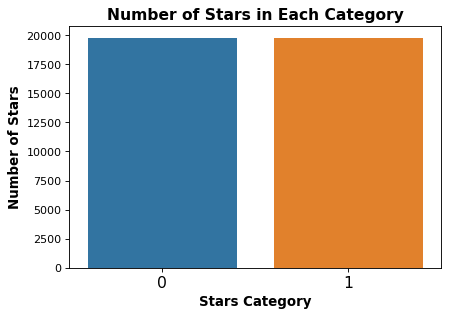

In [18]:
plt.figure(figsize=(6, 4), dpi=80)
sns.countplot(x=df.TargetClass,data=df)
plt.title("Number of Stars in Each Category", fontsize=14, fontweight='bold')
plt.ylabel("Number of Stars", fontsize=12, fontweight='bold')
plt.xlabel("Stars Category", fontsize=12, fontweight='bold')
plt.xticks(size=14)

## Removing outliers

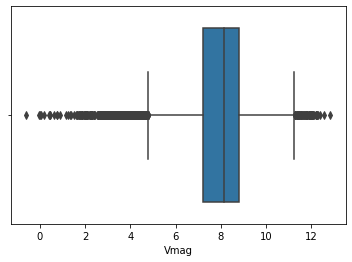

In [19]:
sns.boxplot(df.Vmag)

In [20]:
q3= df.Vmag.quantile(q=0.75)
q1= df.Vmag.quantile(q=0.25)
Iqr = q3 - q1 
upper = (q3 + 1.5 * Iqr) 
lower = (q1 - 1.5 * Iqr) 
print(lower)
print(upper)

4.779999999999999
11.26


In [21]:
df = df[df['Vmag'] < upper]
df

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,10.00,31.66,6.19,1.213,K7V,22.502556,1
1,8.26,3.21,1.00,1.130,K0III,15.792525,0
2,8.27,12.75,1.06,0.596,F9V,18.797552,1
3,6.54,5.23,0.76,1.189,K1III,15.132508,0
4,8.52,0.96,0.72,0.173,B8V,13.431356,1
...,...,...,...,...,...,...,...
39547,5.83,0.17,0.52,0.474,B7Iab,6.982245,0
39548,7.05,18.12,0.92,0.424,F5V,18.340790,1
39549,9.21,3.89,1.46,0.227,A1IV,17.159748,1
39550,9.01,2.13,1.46,1.467,M5III,15.651898,0


In [22]:
df = df[lower<df['Vmag']]
df

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,10.00,31.66,6.19,1.213,K7V,22.502556,1
1,8.26,3.21,1.00,1.130,K0III,15.792525,0
2,8.27,12.75,1.06,0.596,F9V,18.797552,1
3,6.54,5.23,0.76,1.189,K1III,15.132508,0
4,8.52,0.96,0.72,0.173,B8V,13.431356,1
...,...,...,...,...,...,...,...
39547,5.83,0.17,0.52,0.474,B7Iab,6.982245,0
39548,7.05,18.12,0.92,0.424,F5V,18.340790,1
39549,9.21,3.89,1.46,0.227,A1IV,17.159748,1
39550,9.01,2.13,1.46,1.467,M5III,15.651898,0


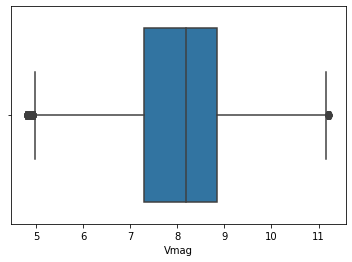

In [23]:
sns.boxplot(df.Vmag)

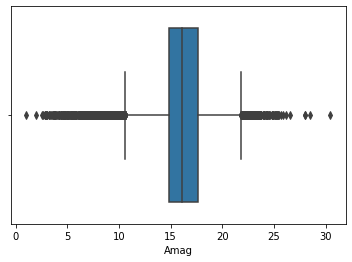

In [24]:
sns.boxplot(df.Amag)

In [25]:
q3= df.Amag.quantile(q=0.75)
q1= df.Amag.quantile(q=0.25)
Iqr = q3 - q1 
upper = (q3 + 1.5 * Iqr) 
lower = (q1 - 1.5 * Iqr) 
print(lower)
print(upper)

10.579655
21.840119


In [26]:
df = df[df['Amag'] < upper]
df

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
1,8.26,3.21,1.00,1.130,K0III,15.792525,0
2,8.27,12.75,1.06,0.596,F9V,18.797552,1
3,6.54,5.23,0.76,1.189,K1III,15.132508,0
4,8.52,0.96,0.72,0.173,B8V,13.431356,1
5,6.09,6.02,0.95,0.040,B8IVn,14.987983,1
...,...,...,...,...,...,...,...
39547,5.83,0.17,0.52,0.474,B7Iab,6.982245,0
39548,7.05,18.12,0.92,0.424,F5V,18.340790,1
39549,9.21,3.89,1.46,0.227,A1IV,17.159748,1
39550,9.01,2.13,1.46,1.467,M5III,15.651898,0


In [27]:
df = df[lower<df['Amag']]
df

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
1,8.26,3.21,1.00,1.130,K0III,15.792525,0
2,8.27,12.75,1.06,0.596,F9V,18.797552,1
3,6.54,5.23,0.76,1.189,K1III,15.132508,0
4,8.52,0.96,0.72,0.173,B8V,13.431356,1
5,6.09,6.02,0.95,0.040,B8IVn,14.987983,1
...,...,...,...,...,...,...,...
39546,8.36,2.44,0.85,1.087,K1III,15.296949,0
39548,7.05,18.12,0.92,0.424,F5V,18.340790,1
39549,9.21,3.89,1.46,0.227,A1IV,17.159748,1
39550,9.01,2.13,1.46,1.467,M5III,15.651898,0


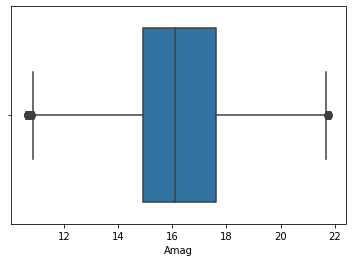

In [28]:
sns.boxplot(df.Amag)

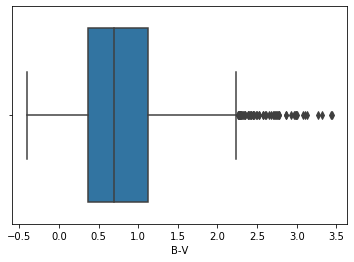

In [29]:
sns.boxplot(df['B-V'])

In [30]:
q3= df['B-V'].quantile(q=0.75)
q1= df['B-V'].quantile(q=0.25)
Iqr = q3 - q1 
upper = (q3 + 1.5 * Iqr) 
lower = (q1 - 1.5 * Iqr) 
print(lower)
print(upper)

-0.7569999999999998
2.2429999999999994


In [31]:
df = df[ df['B-V'] < upper]
df

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
1,8.26,3.21,1.00,1.130,K0III,15.792525,0
2,8.27,12.75,1.06,0.596,F9V,18.797552,1
3,6.54,5.23,0.76,1.189,K1III,15.132508,0
4,8.52,0.96,0.72,0.173,B8V,13.431356,1
5,6.09,6.02,0.95,0.040,B8IVn,14.987983,1
...,...,...,...,...,...,...,...
39546,8.36,2.44,0.85,1.087,K1III,15.296949,0
39548,7.05,18.12,0.92,0.424,F5V,18.340790,1
39549,9.21,3.89,1.46,0.227,A1IV,17.159748,1
39550,9.01,2.13,1.46,1.467,M5III,15.651898,0


In [32]:
df = df[lower< df['B-V']]
df


,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
1,8.26,3.21,1.00,1.130,K0III,15.792525,0
2,8.27,12.75,1.06,0.596,F9V,18.797552,1
3,6.54,5.23,0.76,1.189,K1III,15.132508,0
4,8.52,0.96,0.72,0.173,B8V,13.431356,1
5,6.09,6.02,0.95,0.040,B8IVn,14.987983,1
...,...,...,...,...,...,...,...
39546,8.36,2.44,0.85,1.087,K1III,15.296949,0
39548,7.05,18.12,0.92,0.424,F5V,18.340790,1
39549,9.21,3.89,1.46,0.227,A1IV,17.159748,1
39550,9.01,2.13,1.46,1.467,M5III,15.651898,0


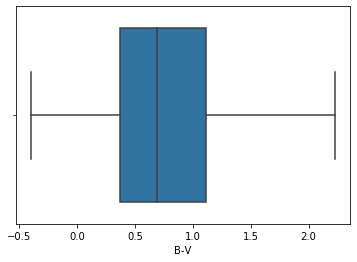

In [33]:
sns.boxplot(df['B-V'])

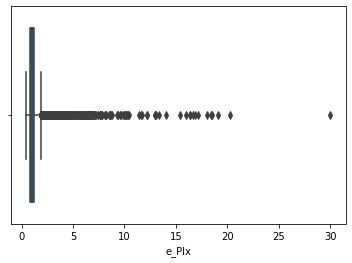

In [34]:
sns.boxplot(df['e_Plx'])

In [35]:
q3= df['e_Plx'].quantile(q=0.75)
q1= df['e_Plx'].quantile(q=0.25)
Iqr = q3 - q1 
upper = (q3 + 1.5 * Iqr) 
lower = (q1 - 1.5 * Iqr) 
print(lower)
print(upper)

0.15500000000000014
1.875


In [36]:
df = df[ df['e_Plx'] < upper]
df

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
1,8.26,3.21,1.00,1.130,K0III,15.792525,0
2,8.27,12.75,1.06,0.596,F9V,18.797552,1
3,6.54,5.23,0.76,1.189,K1III,15.132508,0
4,8.52,0.96,0.72,0.173,B8V,13.431356,1
5,6.09,6.02,0.95,0.040,B8IVn,14.987983,1
...,...,...,...,...,...,...,...
39546,8.36,2.44,0.85,1.087,K1III,15.296949,0
39548,7.05,18.12,0.92,0.424,F5V,18.340790,1
39549,9.21,3.89,1.46,0.227,A1IV,17.159748,1
39550,9.01,2.13,1.46,1.467,M5III,15.651898,0


In [37]:
df = df[lower< df['e_Plx']]
df


,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
1,8.26,3.21,1.00,1.130,K0III,15.792525,0
2,8.27,12.75,1.06,0.596,F9V,18.797552,1
3,6.54,5.23,0.76,1.189,K1III,15.132508,0
4,8.52,0.96,0.72,0.173,B8V,13.431356,1
5,6.09,6.02,0.95,0.040,B8IVn,14.987983,1
...,...,...,...,...,...,...,...
39546,8.36,2.44,0.85,1.087,K1III,15.296949,0
39548,7.05,18.12,0.92,0.424,F5V,18.340790,1
39549,9.21,3.89,1.46,0.227,A1IV,17.159748,1
39550,9.01,2.13,1.46,1.467,M5III,15.651898,0


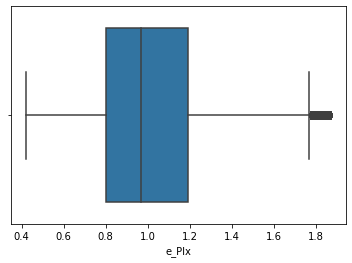

In [38]:
sns.boxplot(df['e_Plx'])

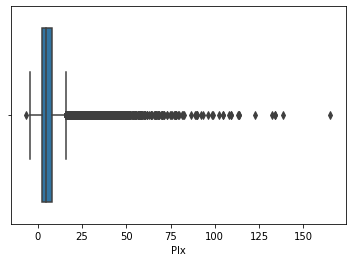

In [39]:
sns.boxplot(df['Plx'])

In [40]:
q3= df['Plx'].quantile(q=0.75)
q1= df['Plx'].quantile(q=0.25)
Iqr = q3 - q1 
upper = (q3 + 1.5 * Iqr) 
lower = (q1 - 1.5 * Iqr) 
print(lower)
print(upper)

-5.63125
16.07875


In [41]:
df = df[ df['Plx'] < upper]
df

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
1,8.26,3.21,1.00,1.130,K0III,15.792525,0
2,8.27,12.75,1.06,0.596,F9V,18.797552,1
3,6.54,5.23,0.76,1.189,K1III,15.132508,0
4,8.52,0.96,0.72,0.173,B8V,13.431356,1
5,6.09,6.02,0.95,0.040,B8IVn,14.987983,1
...,...,...,...,...,...,...,...
39545,7.86,1.58,0.98,1.341,K2III,13.853286,0
39546,8.36,2.44,0.85,1.087,K1III,15.296949,0
39549,9.21,3.89,1.46,0.227,A1IV,17.159748,1
39550,9.01,2.13,1.46,1.467,M5III,15.651898,0


In [42]:
df = df[lower< df['Plx']]
df


,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
1,8.26,3.21,1.00,1.130,K0III,15.792525,0
2,8.27,12.75,1.06,0.596,F9V,18.797552,1
3,6.54,5.23,0.76,1.189,K1III,15.132508,0
4,8.52,0.96,0.72,0.173,B8V,13.431356,1
5,6.09,6.02,0.95,0.040,B8IVn,14.987983,1
...,...,...,...,...,...,...,...
39545,7.86,1.58,0.98,1.341,K2III,13.853286,0
39546,8.36,2.44,0.85,1.087,K1III,15.296949,0
39549,9.21,3.89,1.46,0.227,A1IV,17.159748,1
39550,9.01,2.13,1.46,1.467,M5III,15.651898,0


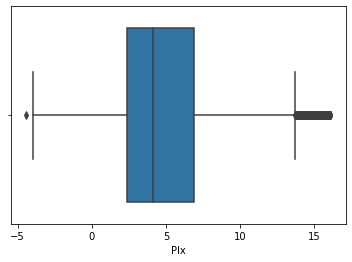

In [43]:
sns.boxplot(df['Plx'])

(array([0, 1]), <a list of 2 Text xticklabel objects>)

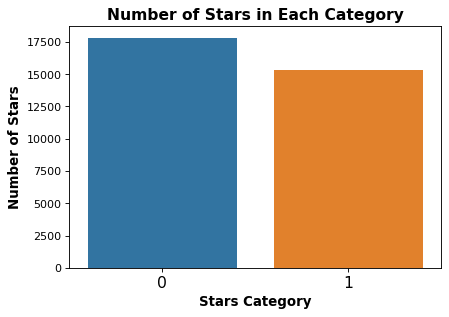

In [44]:
plt.figure(figsize=(6, 4), dpi=80)
sns.countplot(x=df.TargetClass,data=df)
plt.title("Number of Stars in Each Category", fontsize=14, fontweight='bold')
plt.ylabel("Number of Stars", fontsize=12, fontweight='bold')
plt.xlabel("Stars Category", fontsize=12, fontweight='bold')
plt.xticks(size=14)

In [45]:
pip install numpy --upgrade

Note: you may need to restart the kernel to use updated packages.


'C:\Users\Nisreen' is not recognized as an internal or external command,
operable program or batch file.


In [46]:
type(df)
df=pd.get_dummies(df, drop_first=True)

In [47]:
df=pd.get_dummies(df, drop_first=True)

In [48]:
df

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass,SpType_A0/2V + A9:,SpType_A0/A1III,SpType_A0/A1IV,SpType_A0/A1IV/V,...,SpType_O9II,SpType_O9II:,SpType_O9III,SpType_O9III:,SpType_O9IV,SpType_O9Ia,SpType_O9Iab:,SpType_O9Ib,SpType_O9V,SpType_O9Vp...
1,8.26,3.21,1.00,1.130,15.792525,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8.27,12.75,1.06,0.596,18.797552,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6.54,5.23,0.76,1.189,15.132508,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.52,0.96,0.72,0.173,13.431356,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6.09,6.02,0.95,0.040,14.987983,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39545,7.86,1.58,0.98,1.341,13.853286,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39546,8.36,2.44,0.85,1.087,15.296949,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39549,9.21,3.89,1.46,0.227,17.159748,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39550,9.01,2.13,1.46,1.467,15.651898,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df.shape

(33175, 2074)

# Modeling:

In [50]:
X= df.drop(['TargetClass'], axis=1)
y= df['TargetClass']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=3)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=.1111, random_state=3)

In [51]:
X_train.shape

(26539, 2073)

In [52]:
X_test.shape

(3318, 2073)

In [53]:
X_val.shape

(3318, 2073)

In [54]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [55]:
X_train_scaled

array([[ 0.1502674 , -1.01377935,  0.20438346, ..., -0.0122778 ,
        -0.0122778 , -0.00613855],
       [ 0.18657377,  0.15120871,  0.44837619, ..., -0.0122778 ,
        -0.0122778 , -0.00613855],
       [ 0.5587141 , -0.68172961,  0.34380788, ..., -0.0122778 ,
        -0.0122778 , -0.00613855],
       ...,
       [-0.957077  , -0.15832918, -1.1550046 , ..., -0.0122778 ,
        -0.0122778 , -0.00613855],
       [ 0.5587141 , -0.99689547, -0.73673135, ..., -0.0122778 ,
        -0.0122778 , -0.00613855],
       [ 0.94900762, -1.33738715,  0.93636164, ..., -0.0122778 ,
        -0.0122778 , -0.00613855]])

## 1-KNN 

In [53]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
print("The score for kNN is")
print("Training set: {:6.2f}%".format(100*knn.score(X_train_scaled, y_train)))
print("validation set: {:6.2f}%".format(100*knn.score(X_val_scaled, y_val)))
print("kNN confusion matrix: \n\n", confusion_matrix(y_val, knn.predict(X_val_scaled)))

The score for kNN is
Training set:  98.02%
validation set:  97.32%
kNN confusion matrix: 

 [[1803    0]
 [  89 1426]]


## 2-Logistic Regression

In [56]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
print("The score for logistic regression")
print("Training set is : {:6.2f}%".format(100*log_reg.score(X_train_scaled, y_train)))
print("validation set is: {:6.2f}%".format(100*log_reg.score(X_val_scaled, y_val)))
print("logistic regression confusion matrix: \n\n", confusion_matrix(y_val, log_reg.predict(X_val_scaled)))

The score for logistic regression
Training set is : 100.00%
validation set is:  98.49%
logistic regression confusion matrix: 

 [[1763   40]
 [  10 1505]]


## 3- Decision Tree 

In [55]:
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train_scaled, y_train)
print("The score for decision tree ")
print("Training set is : {:6.2f}%".format(100*decisiontree.score(X_train_scaled, y_train)))
print("validation set is: {:6.2f}%".format(100*decisiontree.score(X_val_scaled, y_val)))
print("decision tree confusion matrix: \n\n", confusion_matrix(y_val, decisiontree.predict(X_val_scaled)))

The score for decision tree 
Training set is : 100.00%
validation set is:  96.11%
decision tree confusion matrix: 

 [[1719   84]
 [  45 1470]]


## 4-Random Forest

In [56]:
randomforest = RandomForestClassifier()
randomforest.fit(X_train_scaled, y_train)
print("The score for random forest ")
print("Training set is : {:6.2f}%".format(100*randomforest.score(X_train_scaled, y_train)))
print("validation set is: {:6.2f}%".format(100*randomforest.score(X_val_scaled, y_val)))
print("decision tree confusion matrix: \n\n", confusion_matrix(y_val, randomforest.predict(X_val_scaled)))

The score for random forest 
Training set is : 100.00%
validation set is:  96.50%
decision tree confusion matrix: 

 [[1739   64]
 [  52 1463]]


## 5-XGBClassifier

In [57]:
gbm = xgb.XGBClassifier()
gbm.fit(X_train_scaled, y_train)
print("The score for XGB classifier")
print("Training set is : {:6.2f}%".format(100*gbm.score(X_train_scaled, y_train)))
print("validation set is: {:6.2f}%".format(100*gbm.score(X_val_scaled, y_val)))
print("decision tree confusion matrix: \n\n", confusion_matrix(y_val, gbm.predict(X_val_scaled)))

C:\Users\asus\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:08:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The score for XGB classifier
Training set is :  96.51%
validation set is:  95.48%
decision tree confusion matrix: 

 [[1712   91]
 [  59 1456]]


## 6-Naive Bayes

In [58]:
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
print("The score for NB model ")
print("Training set is : {:6.2f}%".format(100*nb.score(X_train_scaled, y_train)))
print("validation set is: {:6.2f}%".format(100*nb.score(X_val_scaled, y_val)))
print("NB confusion matrix: \n\n", confusion_matrix(y_val, nb.predict(X_val_scaled)))

The score for NB model 
Training set is : 100.00%
validation set is:  97.53%
NB confusion matrix: 

 [[1721   82]
 [   0 1515]]


## 7-SVM

In [59]:
svc= svm.SVC()
svc.fit(X_train_scaled, y_train)
print("The score for SVM model ")
print("Training set is : {:6.2f}%".format(100*svc.score(X_train_scaled, y_train)))
print("validation set is: {:6.2f}%".format(100*svc.score(X_val_scaled, y_val)))
print("decision tree confusion matrix: \n\n", confusion_matrix(y_val, svc.predict(X_val_scaled)))

The score for SVM model 
Training set is : 100.00%
validation set is:  98.34%
decision tree confusion matrix: 

 [[1767   36]
 [  19 1496]]


## Tuning SVM


In [83]:
svc= svm.SVC(gamma=.0001,kernel='sigmoid')
svc.fit(X_train_scaled, y_train)
print("The score for SVM model ")
print("Training set is : {:6.2f}%".format(100*svc.score(X_train_scaled, y_train)))
print("validation set is: {:6.2f}%".format(100*svc.score(X_val_scaled, y_val)))
print("decision tree confusion matrix: \n\n", confusion_matrix(y_val, svc.predict(X_val_scaled)))

The score for SVM model 
Training set is : 100.00%
validation set is:  98.58%
decision tree confusion matrix: 

 [[1768   35]
 [  12 1503]]


## Tuning and Grid Search for Logistic Regression

In [62]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=5)
logreg_cv.fit(X_train_scaled, y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\asus\anaconda3\lib\site-packages\skle

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}
accuracy : 0.9882437692663668


In [57]:
log_reg = LogisticRegression(C= 0.01,penalty= 'l2',solver='saga')
log_reg.fit(X_train_scaled, y_train)
print("The score for logistic regression")
print("Training set is : {:6.2f}%".format(100*log_reg.score(X_train_scaled, y_train)))
print("validation set is: {:6.2f}%".format(100*log_reg.score(X_val_scaled, y_val)))
print("logistic regression confusion matrix: \n\n", confusion_matrix(y_val, log_reg.predict(X_val_scaled)))

C:\Users\Nisreen Abdullah\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


The score for logistic regression
Training set is : 100.00%
validation set is:  98.70%
logistic regression confusion matrix: 

 [[1773   30]
 [  13 1502]]


## Testing best models

In [84]:
X_data = pd.concat([X_train, X_val])
y_data = pd.concat([y_train, y_val])

In [101]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_data)
X_test_scaled = scaler.transform(X_test)

In [102]:
log_reg = LogisticRegression(C= 0.01,penalty= 'l2',solver='saga')
log_reg.fit(X_scaled, y_data)
y_pred = log_reg.predict(X_test_scaled)
print("The score for logistic regression")
print("Training set is : {:6.2f}%".format(100*log_reg.score(X_scaled, y_data)))
print("Testing set is : {:6.2f}%".format(100*accuracy_score(y_test, y_pred)))
print("confusion matrix: \n\n",confusion_matrix(y_test, y_pred))

C:\Users\Nisreen Abdullah\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


The score for logistic regression
Training set is : 100.00%
Testing set is :  99.01%
confusion matrix: 

 [[1733   19]
 [  14 1552]]


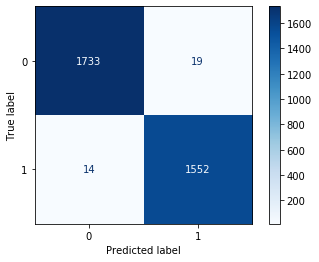

In [109]:
plot_confusion_matrix(log_reg, X_test_scaled, y_test, cmap=plt.cm.Blues)  
plt.show()

In [110]:
svc= svm.SVC(gamma=.0001,kernel='sigmoid')
svc.fit(X_scaled, y_data)
y_pred = svc.predict(X_test_scaled)
print("The score for SVM")
print("Training set is : {:6.2f}%".format(100*svc.score(X_scaled, y_data)))
print("Testing set is : {:6.2f}%".format(100*accuracy_score(y_test, y_pred)))
print("confusion matrix: \n\n",confusion_matrix(y_test, y_pred))

The score for SVM
Training set is : 100.00%
Testing set is :  98.85%
confusion matrix: 

 [[1728   24]
 [  14 1552]]


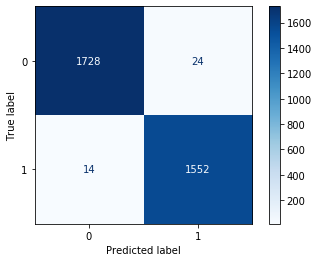

In [111]:
plot_confusion_matrix(svc, X_test_scaled, y_test, cmap=plt.cm.Blues)  
plt.show()


# Saving my models


In [115]:
with open(f"models/log_reg.pickle", "wb") as pfile:
    pickle.dump(log_reg, pfile)

In [116]:
with open(f"models/svc.pickle", "wb") as pfile:
    pickle.dump(svc, pfile)